In [1]:
#importing the librerie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#importing the data set
data = pd.read_csv("C:\DataSets\German Credit Data.csv")
data.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [3]:
#printing the shape and info
print("shape : ", data.shape)
print("Info : " )
data.info()

shape :  (1000, 14)
Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [4]:
#Encoding the data 
X_features = data.drop(columns = 'status')
encoded_data = pd.get_dummies(X_features, drop_first= True)
print(list(encoded_data.columns))

['duration', 'amount', 'inst_rate', 'residing_since', 'age', 'num_credits', 'checkin_acc_A12', 'checkin_acc_A13', 'checkin_acc_A14', 'credit_history_A31', 'credit_history_A32', 'credit_history_A33', 'credit_history_A34', 'savings_acc_A62', 'savings_acc_A63', 'savings_acc_A64', 'savings_acc_A65', 'present_emp_since_A72', 'present_emp_since_A73', 'present_emp_since_A74', 'present_emp_since_A75', 'personal_status_A92', 'personal_status_A93', 'personal_status_A94', 'inst_plans_A142', 'inst_plans_A143', 'job_A172', 'job_A173', 'job_A174']


In [5]:
#seperating the target variable
X = encoded_data
y = data['status']

In [6]:
#splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
#Building the decision tree classifier using entropy
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)


In [8]:
#Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [9]:
#predicting the values
y_pred = clf.predict(X_test)

In [10]:
#printing the accuracy
print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.7266666666666667


In [11]:
#confussion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[198  11]
 [ 71  20]]


Text(0.5, 1.0, 'Confusion Matrix')

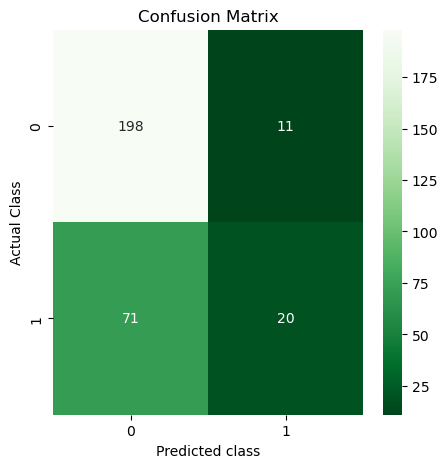

In [12]:
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt= 'd', cmap = 'Greens_r')
plt.xlabel("Predicted class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")

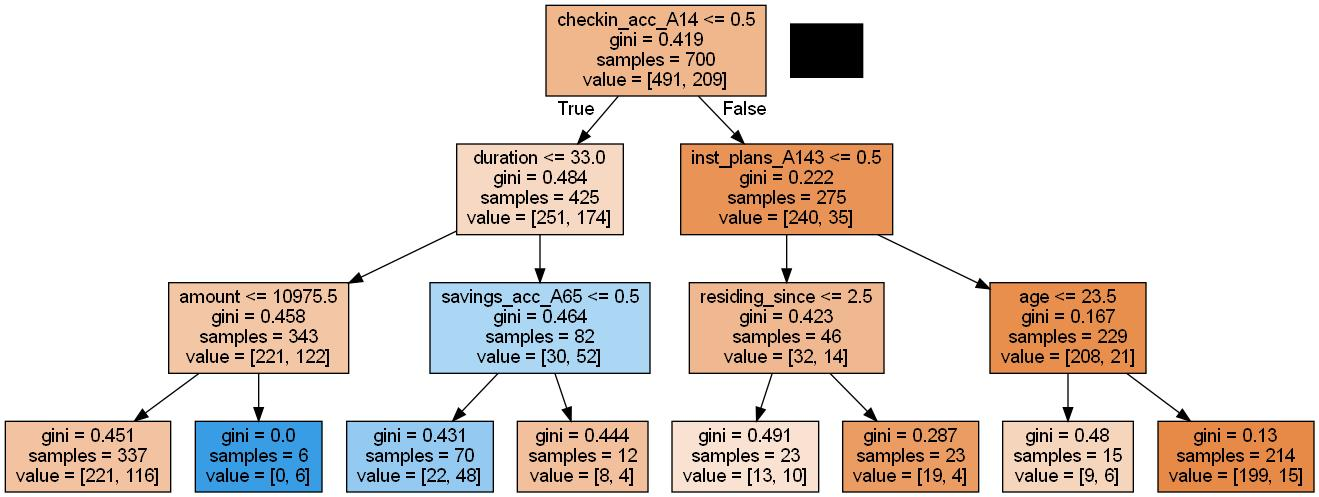

In [13]:
#visualizing the tree
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image
export_graphviz(clf,out_file = "tree.odt", feature_names = X_train.columns, filled = True)
graph = pdot.graphviz.graph_from_dot_file("tree.odt")
graph.write_jpg("tree.png")
Image(filename = "tree.png")